In [47]:
import pandas as pd
df = pd.read_excel("default.xls")
df.rename(columns={"default payment next month": "Default"}, inplace=True)

In [48]:
df.loc[df["MARRIAGE"] == 0, 'MARRIAGE'] = 3
df.loc[df["EDUCATION"] == 0, 'EDUCATION'] = 4
df.loc[df["EDUCATION"] == 5, 'EDUCATION'] = 4
df.loc[df["EDUCATION"] == 6, 'EDUCATION'] = 4
df['age_category'] = pd.cut(x=df['AGE'], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=[1, 2, 3, 4, 5, 6, 7])
df.drop(['AGE'], axis=1, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,age_category
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,4,50000,2,2,1,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,5,50000,1,2,1,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,4


In [49]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, df.columns != 'Default']
y = df['Default']
x = StandardScaler().fit_transform(x)


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5'])
finalDf = pd.concat([principalDf, df[['Default']]], axis = 1)

In [51]:
finalDf.head()

,pc1,pc2,pc3,pc4,pc5,Default
0,-1.891373,-0.924442,-0.528930,-0.499185,-0.316922,1
1,-0.774030,-2.138635,1.162818,-0.645878,-0.231928,1
2,-0.856843,-1.102902,0.391952,-0.459591,-0.371182,0
3,-0.207595,-0.863066,-0.650196,0.168749,-0.336351,0
4,-0.858168,-0.157998,-0.679419,2.165307,-1.801079,0


In [39]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Default'], df['Default'], stratify=df['Default'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(finalDf.loc[:, finalDf.columns != 'Default'], finalDf['Default'], stratify=finalDf['Default'], test_size=0.2, random_state=42)
# X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(finalDf.loc[:, df.columns != 'Default'], df['Default'], stratify=df['Default'], test_size=0.2, random_state=42)

In [52]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [53]:
import numpy as np
np.bincount(y_train)

array([18691, 18691], dtype=int64)

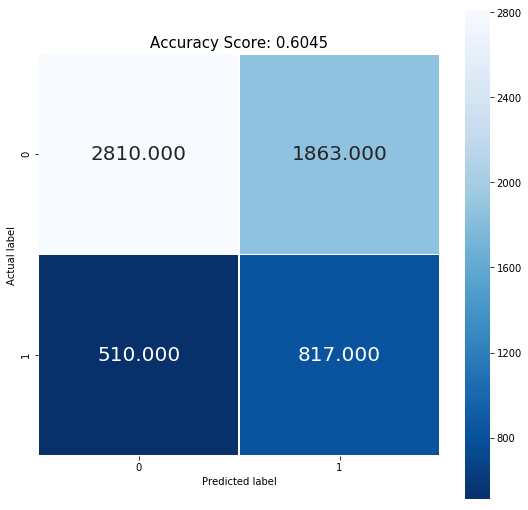

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
LR = LogisticRegression()
LR.fit(X_train, y_train)
score_LR = LR.score(X_test, y_test)
predictions_LR = LR.predict(X_test)
cm_LR = metrics.confusion_matrix(y_test, predictions_LR)
plt.figure(figsize=(9,9))
sns.heatmap(cm_LR, annot=True, fmt=".3f", linewidths=.5, annot_kws={"size": 20}, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_LR)
plt.title(all_sample_title, size = 15);
plt.show()

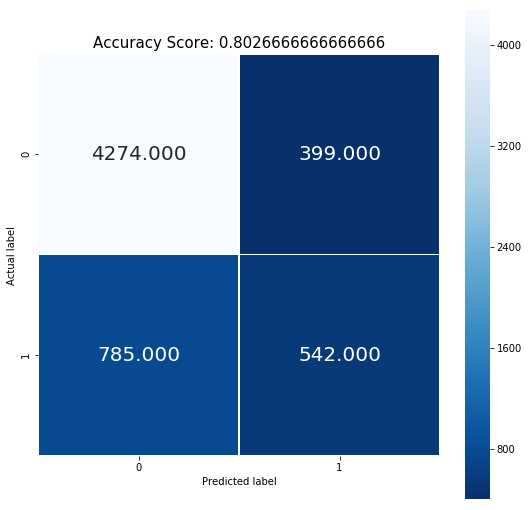

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
DT = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
DT = DT.fit(X_train, y_train)
score_DT = DT.score(X_test, y_test)
predictions_DT = DT.predict(X_test)
cm_DT = metrics.confusion_matrix(y_test, predictions_DT)
plt.figure(figsize=(9,9))
sns.heatmap(cm_DT, annot=True, fmt=".3f", linewidths=.5, annot_kws={"size": 20}, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_DT)
plt.title(all_sample_title, size = 15);
plt.show()

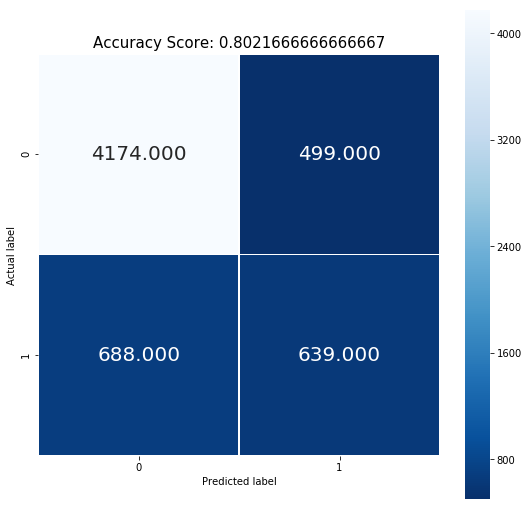

In [56]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
RF = RandomForestClassifier(n_estimators=25, criterion='entropy', max_depth=6)
RF = RF.fit(X_train, y_train)
score_RF = RF.score(X_test, y_test)
predictions_RF = RF.predict(X_test)
cm_RF = metrics.confusion_matrix(y_test, predictions_RF)
plt.figure(figsize=(9,9))
sns.heatmap(cm_RF, annot=True, fmt=".3f", linewidths=.5, annot_kws={"size": 20},square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_RF)
plt.title(all_sample_title, size = 15);
plt.show()

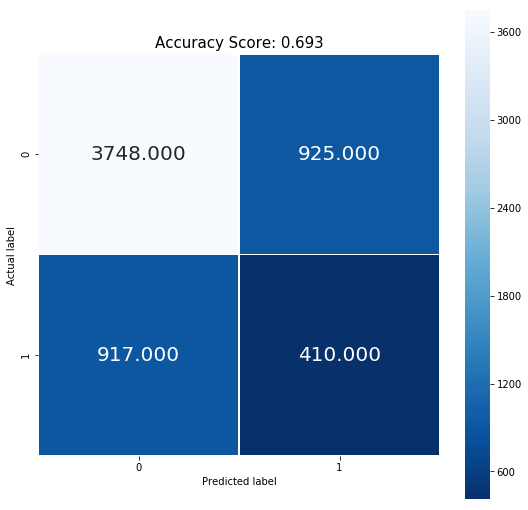

In [57]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN = KNN.fit(X_train, y_train)
score_KNN = KNN.score(X_test, y_test)
predictions_KNN = KNN.predict(X_test)
cm_KNN = metrics.confusion_matrix(y_test, predictions_KNN)
plt.figure(figsize=(9,9))
sns.heatmap(cm_KNN, annot=True, fmt=".3f", linewidths=.5,annot_kws={"size": 20}, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_KNN)
plt.title(all_sample_title, size = 15);
plt.show()